In [14]:
import pandas as pd
from report.plots import plot_loss_curve, plot_acc_curve
from report import basic_report

In [2]:
pd.set_option('display.max_rows', None)
metrics = pd.read_csv("./experiments/version_1/metrics.csv")
metrics['epoch'] = metrics['epoch'].fillna(method='ffill')

In [3]:
metrics.head()

,train_loss_step,train_acc_step,epoch,step,val_loss_step,val_acc_step,val_loss_epoch,val_acc_epoch,train_loss_epoch,train_acc_epoch
0,1.412057,0.28125,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.450406,0.21875,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.443827,0.25000,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.429382,0.31250,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.337982,0.34375,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
metrics.shape

(5430, 10)

In [9]:
import numpy as np
EPOCHS = 30

def log_to_metrics_dataframe(epochs):
    train_metrics = []
    valid_metrics = []
    epoch_train_metrics = []
    epoch_valid_metrics = []
    
    for n, batch in enumerate(np.split(metrics, epochs)):
        train_metrics.append(batch[["epoch", "step", "train_loss_step", "train_acc_step"]][:125])
        valid_metrics.append(batch[["epoch", "step", "val_loss_step", "val_acc_step"]][125:179])
        epoch_valid_metrics.append(batch[["epoch", "val_loss_epoch", "val_acc_epoch"]][179:180])
        epoch_train_metrics.append(batch[["epoch", "train_loss_epoch", "train_acc_epoch"]][180:181])
    
    train_metrics = pd.concat(train_metrics, axis=0)
    valid_metrics = pd.concat(valid_metrics, axis=0)
    epoch_train_metrics = pd.concat(epoch_train_metrics, axis=0)
    epoch_valid_metrics = pd.concat(epoch_valid_metrics, axis=0)
    epoch_metrics = pd.merge(epoch_train_metrics, epoch_valid_metrics, on='epoch')
    epoch_metrics["train_acc_epoch"] = epoch_metrics["train_acc_epoch"] * 100
    epoch_metrics["val_acc_epoch"] = epoch_metrics["val_acc_epoch"] * 100
    return train_metrics, valid_metrics, epoch_metrics

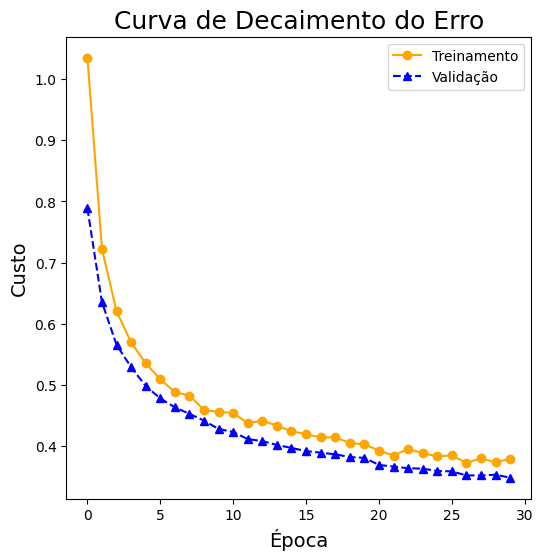

In [10]:
plot_loss_curve(epoch_metrics, show=True, save_as=None)

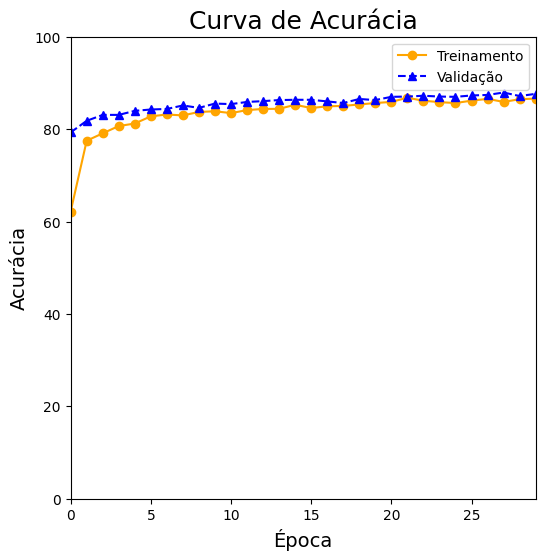

In [11]:
plot_acc_curve(epoch_metrics, show=True, save_as=None)

In [12]:
import pickle
with open("preds.dump", "rb") as f:
    truth_labels, preds_labels = pickle.load(f)

Classification report
              precision    recall  f1-score   support

      glioma      0.840     0.803     0.821       300
  meningioma      0.725     0.559     0.631       306
     notumor      0.911     0.936     0.923       405
   pituitary      0.777     0.963     0.860       300

    accuracy                          0.824      1311
   macro avg      0.813     0.815     0.809      1311
weighted avg      0.821     0.824     0.817      1311



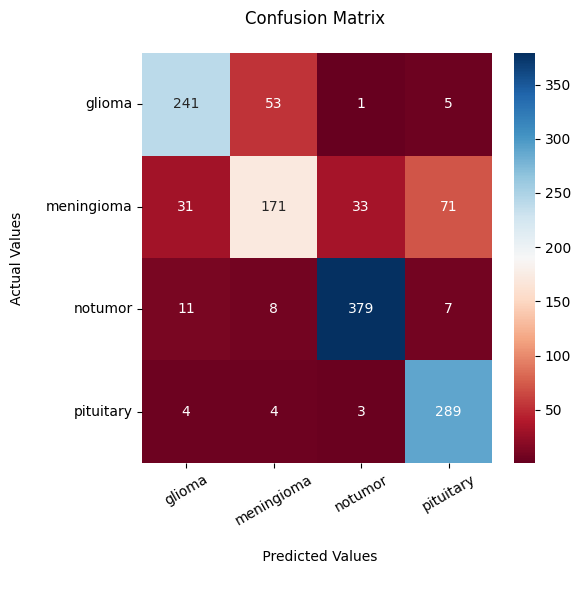

,gli,men,not,pit
glioma,241,53,1,5
meningioma,31,171,33,71
notumor,11,8,379,7
pituitary,4,4,3,289


In [15]:
basic_report(truth_labels, preds_labels, labels=[0,1,2,3], label_names=["glioma", "meningioma", "notumor", "pituitary"], show=True, save_as=None)